In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

%matplotlib inline

In [2]:
# train, test 불러오기
train = pd.read_csv('/Users/kimdaehyeon/kaggle/exercise/타이타닉/train.csv')
test = pd.read_csv('/Users/kimdaehyeon/kaggle/exercise/타이타닉/test.csv')

# shape, columns, head, describe

In [3]:
# shape
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
# columns
train.columns

# target = Survived 설정

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# head
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# 각 feature types
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 데이터를 보니 Age가 개수가 다름.
### 결측치가 있다고 보임

# 결측치, Target Label

In [8]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# 결측치 확인
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### train에 age : 177개, cabin에 687개
### test에 age : 86개, cabin에 327개

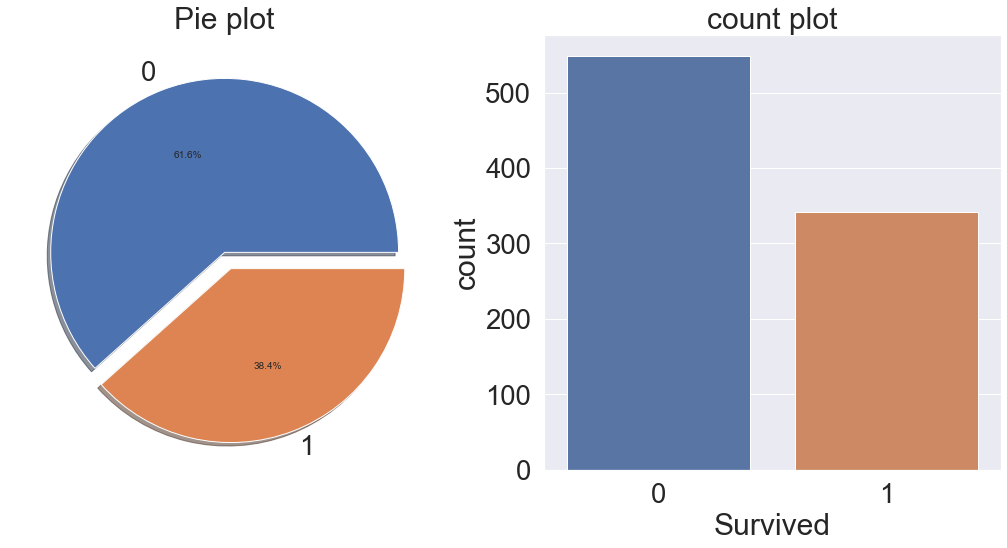

In [10]:
# target label
f, ax = plt.subplots(1, 2, figsize = (18, 8))

# explode : 각 항목을 파이의 원점에서 튀어 나오는 정도를 나타냄.
train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%',
                                        ax = ax[0], shadow = True)
ax[0].set_title('Pie plot')
ax[0].set_ylabel('')

sns.countplot(x = 'Survived', data = train, ax = ax[1])
ax[1].set_title('count plot')

plt.show()

### target의 분포가 균일

# EDA

# Columns 살펴보기

In [11]:
# Pclass는 서수형 데이터 
# - 카테고리이면서 순서가 있는 데이터 타입
# - Pclass에 따른 생존률의 차이를 살펴보자

# groupby를 사용하면 쉽게 할 수 있음

In [12]:
# pclass 그룹 별 데이터 카운트 
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# pclass 그룹 별 생존자 수 합
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있음

# margin을 사용하면 총합을 볼 수 있음
pd.crosstab(train['Pclass'], train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
# mean은 생존률을 구하게 할 수 있음.
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

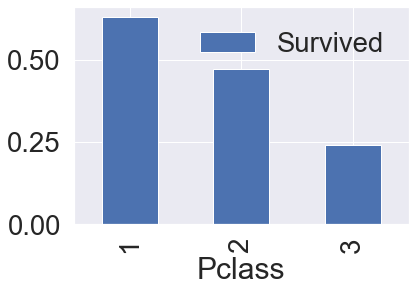

In [16]:
# 이를 전체적으로 시각화
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar()

### 생존에 Pclass가 큰 영향을 미침
### 중요한 feature

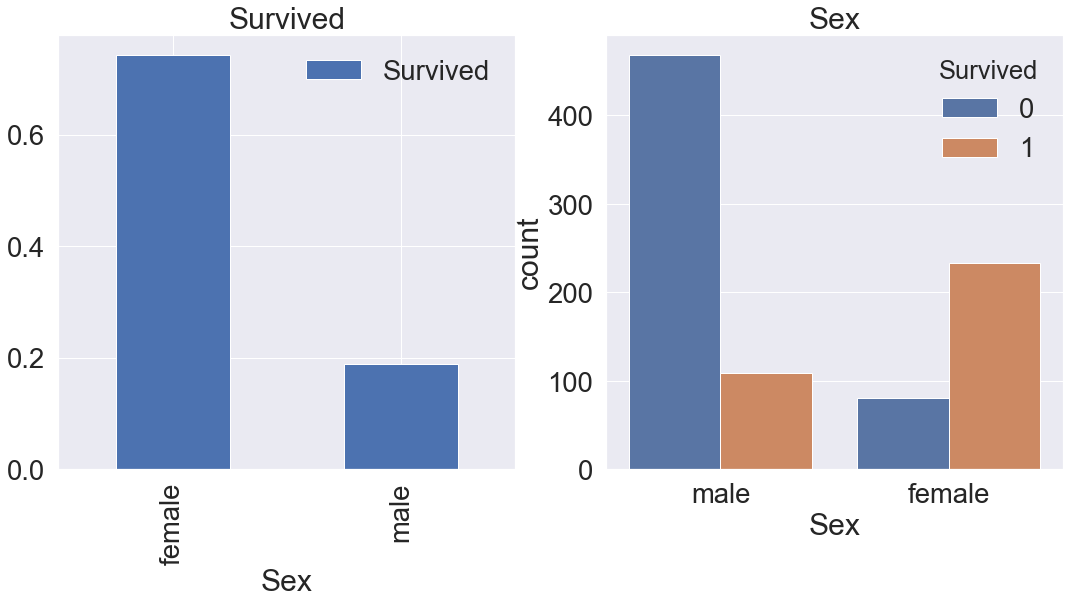

In [17]:
# Sex
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])

ax[0].set_title('Survived')
sns.countplot(x = 'Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Sex')

plt.show()

### female이 생존할 확률이 높음.
### 중요한 feature

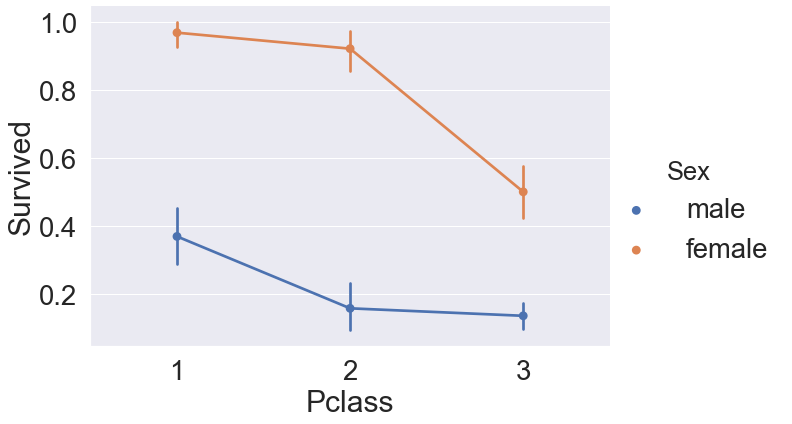

In [18]:
# Sex and Pclass
sns.factorplot(x = 'Pclass', y = 'Survived',hue = 'Sex', data = train, size = 6, aspect = 1.5)

### 모든 클래스에서 female이 생존할 확률이 높음

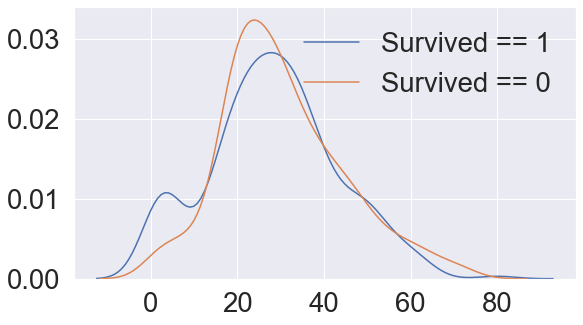

In [19]:
# Age
fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(train[train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

### 15세 미만에서 생존률이 높음

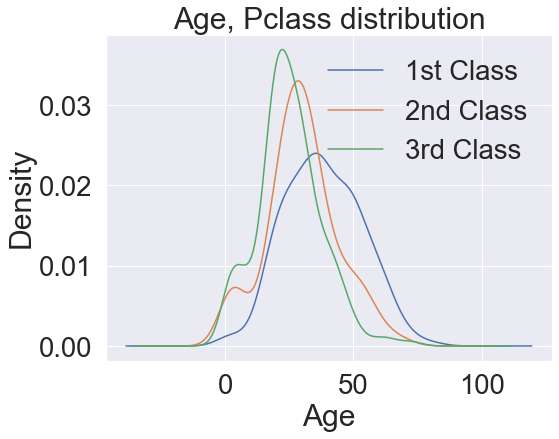

In [20]:
# Pclass, Age 통계
plt.figure(figsize = (8, 6))
train['Age'][train['Pclass'] == 1].plot(kind = 'kde')
train['Age'][train['Pclass'] == 2].plot(kind = 'kde')
train['Age'][train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age, Pclass distribution')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### Class가 높아질수록 나이 연령대가 높아짐

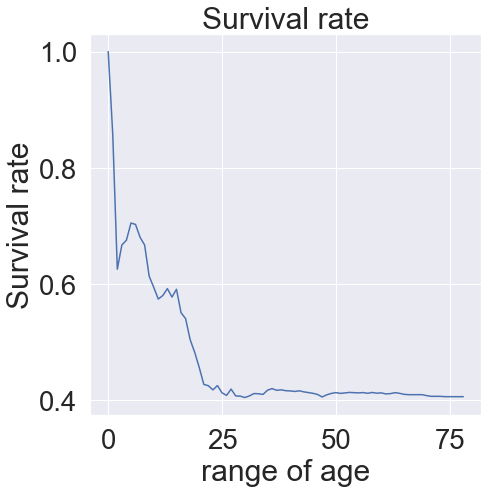

In [21]:
# Age가 높아질수록 생존 확률이 어떻게 되는지 살펴보자
# 누적 확률
survival_ratio = []
# train['Age'].max() == 80

for i in range(1, 80) :
    survival_ratio.append(train[train['Age'] < i]['Survived'].sum()/
                         len(train[train['Age'] < i]['Survived']))
plt.figure(figsize = (7,7))
plt.plot(survival_ratio)
plt.title('Survival rate')
plt.ylabel('Survival rate')
plt.xlabel('range of age')

plt.show()

### 나이가 어릴 수록 생존률이 확실히 높음

## 지금까지 종합해보면
## 1. 여자
## 2. 나이가 어림
## 3. 클래스가 높을 수록 
## => 생존확률이 높음

In [22]:
# Embarked
# 항구가 뭐뭐 있는지 확인
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked'>

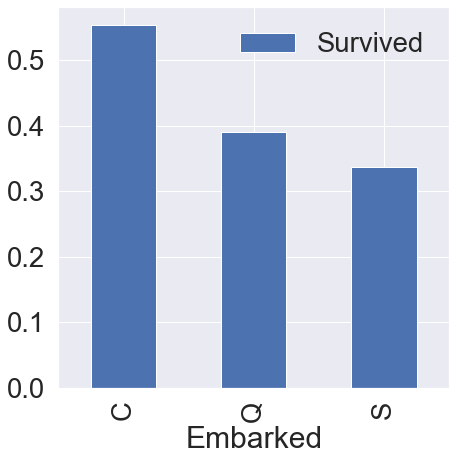

In [23]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

### 탑승한 곳에 따라 생존률의 차이가 많이 보이지는 않음
### 그럼에도 차이가 있으니 피쳐로 사용

### => 그럼 다른 피쳐와의 상관관계를 한번 알아보자


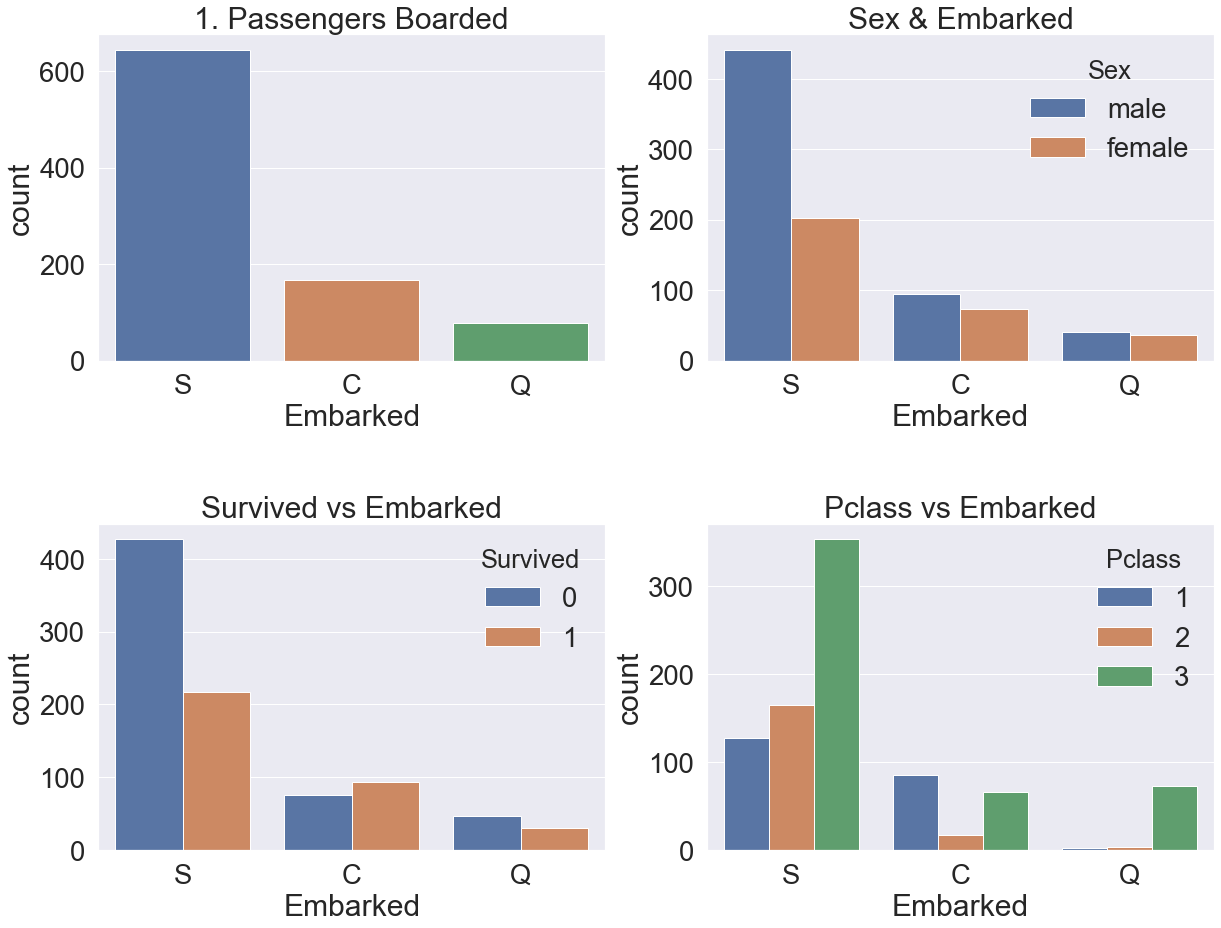

In [24]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = train, ax = ax[0, 0])
ax[0,0].set_title('1. Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = train, ax = ax[0,1])
ax[0,1].set_title('Sex & Embarked')

sns.countplot('Embarked', hue = 'Survived', data = train, ax = ax[1,0])
ax[1,0].set_title('Survived vs Embarked')

sns.countplot('Embarked', hue = 'Pclass', data = train, ax = ax[1,1])
ax[1,1].set_title('Pclass vs Embarked')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

plt.show()

### (1) S 항구에서 가장 많은 사람이 탐.
### (2) S 항구에서 남자가 여자보다 많이 탔고, 나머지 항구는 비슷
### (3) S 항구에서 탄 사람들이 대부분 생존하지 못함
### (4) 클래스가 높은 좌석을 탄 사람들이 생존률이 높음

In [25]:
# Family = SibSp + Parch
# SibSp와 Parch를 합치면 함께 탑승한 가족의 수
train['Family'] = train['SibSp'] + train['Parch'] + 1 # 자기 자신을 포함해야 하므로 1을 더함
test['Family'] = test['SibSp'] + test['Parch'] + 1 # 자기 자신을 포함해야 하므로 1을 더함

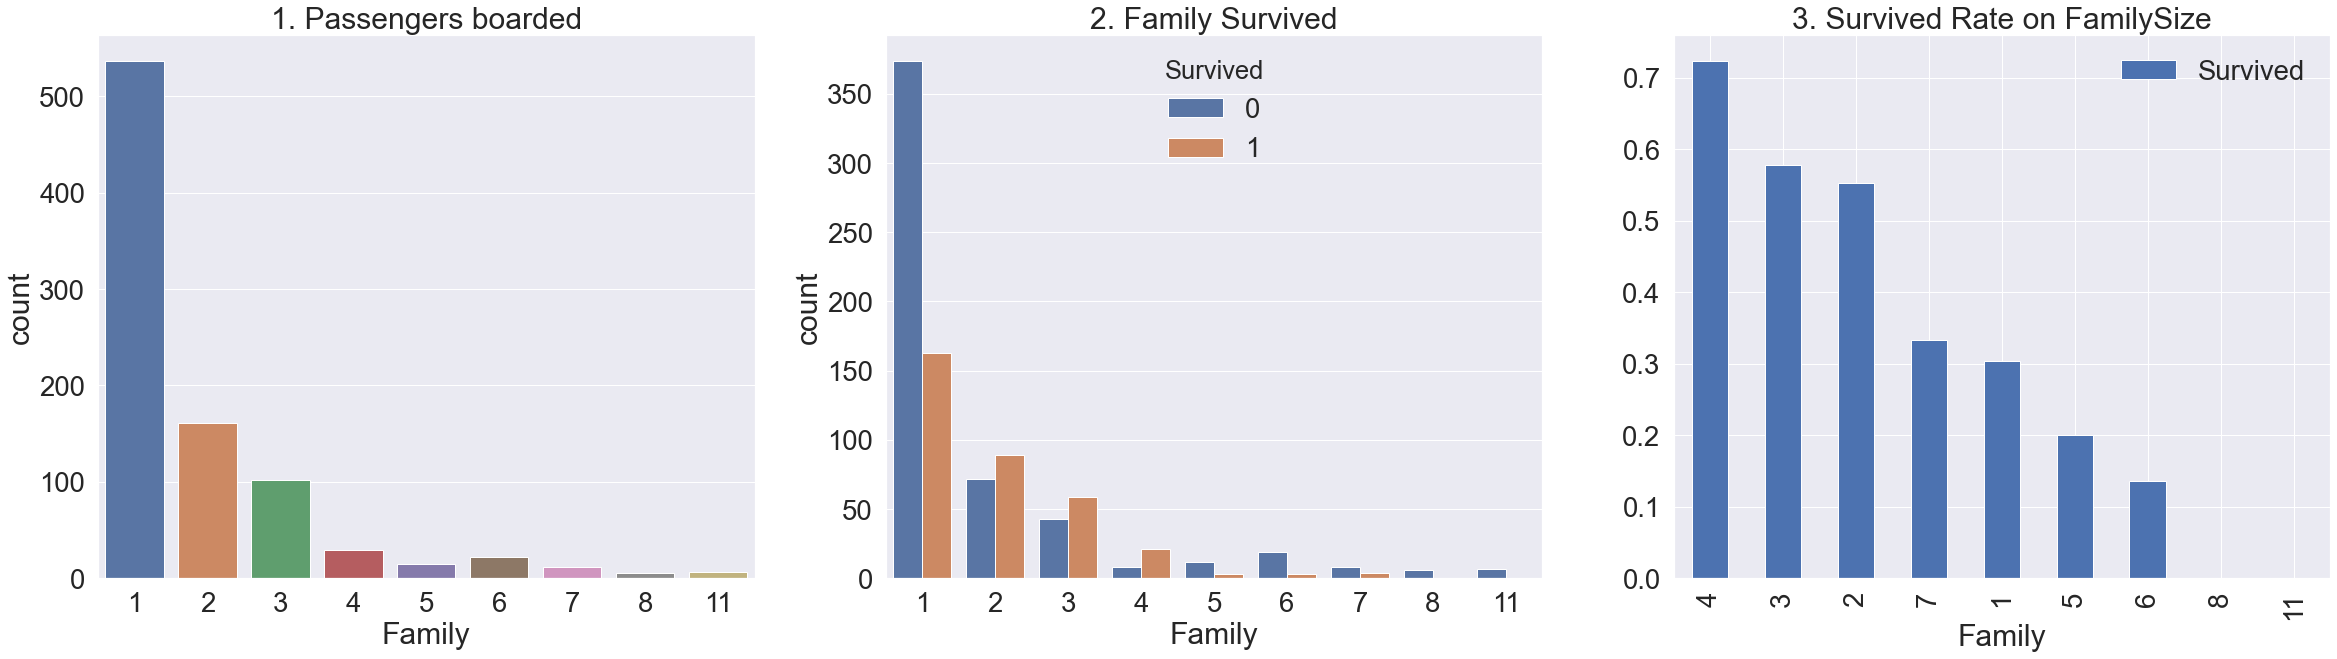

In [26]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot('Family', data = train, ax = ax[0])
ax[0].set_title('1. Passengers boarded')

sns.countplot('Family', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('2. Family Survived')

train[['Survived', 'Family']].groupby(['Family'], as_index = True).mean().sort_values(by = 'Survived', ascending 
                                                                                             = False).plot.bar(ax = ax[2])
ax[2].set_title('3. Survived Rate on FamilySize')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

plt.show()

### 1. 가족 크기가 1 ~ 11까지 있음, 대부분 1명임
### 2. 가족이 4명인 경우가 생존확률이 높음, 가족수가 많아질수록 생존확률이 낮아짐
### 3. 3 ~ 4명일때를 제외하고 생존확률이 낮음

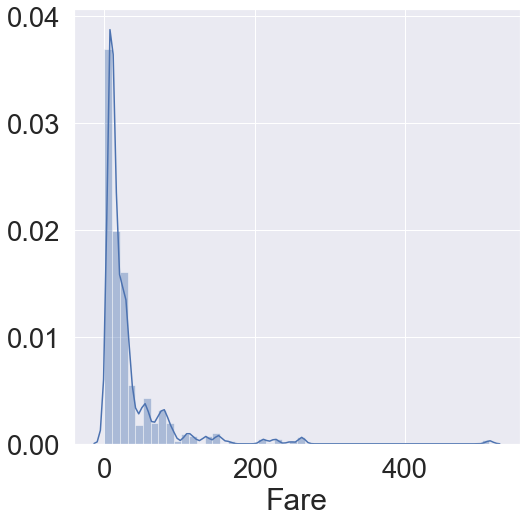

In [27]:
# Fare
# 연속적인 데이터이므로 histogram
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.distplot(train['Fare'], color = 'b', ax = ax)
plt.show()

### 왼쪽으로 너무 치우쳐져 있음.
### 로그 변환 해줄 것

In [28]:
# 아까 test['Fare']에 null 값이 있었음
# 평균값으로 대체하자
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [29]:
# 로그변환
train['Fare'] = np.log1p(train['Fare'])
test['Fare'] = np.log1p(test['Fare'])

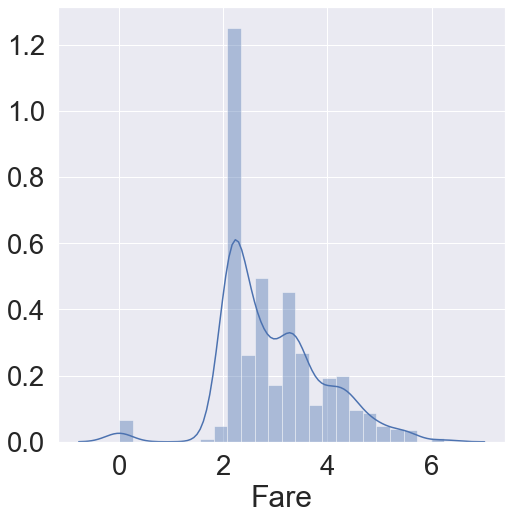

In [30]:
# 로그변환한 데이터 다시 출력
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.distplot(train['Fare'], color = 'b', ax = ax)
plt.show()

### 사실 로그 변환은 feature engineering에서 하는 작업

In [31]:
# Cabin
# 이 데이터는 80프로가 결측치이므로 패스

In [32]:
# Ticket
# 한번 분석에 이용해보기
# 가설
# 1. 창가와 중앙 자리를 생각..?
# 2. 만약 배가 층수가 있다면 층수마다 생존률..?

# Feature Engineering

## Fill Null, One - Hot encoding, drop columns, 

In [33]:
# 아까 Age에 177개 결측치 확인했었음
# 이를 채울 수 있는 여러 아이디어가 있을 것
# 영어에서는 Miss, Mrr, Mrs 같은 Title이 존재
# 이를 이용해보자
train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [34]:
# crosstab을 이용하여 우리가 추출한 initial과 sex 간의 count를 살펴보자
pd.crosstab(train['Initial'], train['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [35]:
# 성별이 뚜렷한 사람들은 Mr, Miss, 잘 모르겠는 사람들은 other로 바꾸기 
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [36]:
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.381361,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.186850,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.730644,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.485292,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.689965,1.222222


<AxesSubplot:xlabel='Initial'>

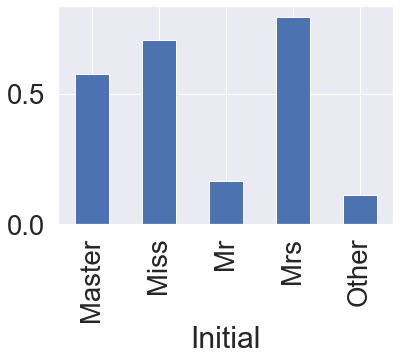

In [37]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [38]:
# Age null data
# 이제 null data를 채울 것임.
# statistics를 활용
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.381361,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.186850,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.730644,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.485292,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.689965,1.222222


In [39]:
# 각 이름들의 평균값으로 대체할 것임
# 소수점 첫 번째 자리에서 반올림 
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46

test.loc[(test.Age.isnull()) & (test.Initial == 'Mr'), 'Age'] = 33
test.loc[(test.Age.isnull()) & (test.Initial == 'Master'), 'Age'] = 5
test.loc[(test.Age.isnull()) & (test.Initial == 'Miss'), 'Age'] = 22
test.loc[(test.Age.isnull()) & (test.Initial == 'Mrs'), 'Age'] = 36
test.loc[(test.Age.isnull()) & (test.Initial == 'Other'), 'Age'] = 46

In [40]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 Family           0
 Initial          0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 Family           0
 Initial          0
 dtype: int64)

### 전처리 완료 

In [41]:
# Embarked null data
# train data에 null data가 2개밖에 없었고, 대부분이 S등급이였으니 S등급으로 채운다.
train['Embarked'] = train['Embarked'].fillna('S')

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
Initial          0
dtype: int64

In [43]:
# Change Age
# continuous => categorical
# 사실 연속적인 변수를 categorical로 바꾸면 infomation loss가 생길 수도 있음

In [44]:
def category_age(x) :
    if x < 10 :
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4 
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    else :
        return 7
    
train['Age_categorical'] = train['Age'].apply(category_age)
test['Age_categorical'] = test['Age'].apply(category_age) 

In [45]:
train.groupby(['Age_categorical'])['PassengerId'].count()

Age_categorical
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

### 원래는 'Age' 칼럼을 없애는게 맞지만 상관 관계가 높아도 모델의 설명력에 도움이 될 수 있으니 남겨 보자.

In [46]:
# Chang Initial, Embarked and Sex
# 현재 Initial은 범주형이므로 컴퓨터가 인식할 수 있도록 수치화 시켜야 함
# map method를 사용
train['Initial'] = train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 
                                        'Mrs' : 3, 'Other' : 4})
test['Initial'] = test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 
                                        'Mrs' : 3, 'Other' : 4})

In [47]:
# Embarked와 Sex도 마찬가지
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

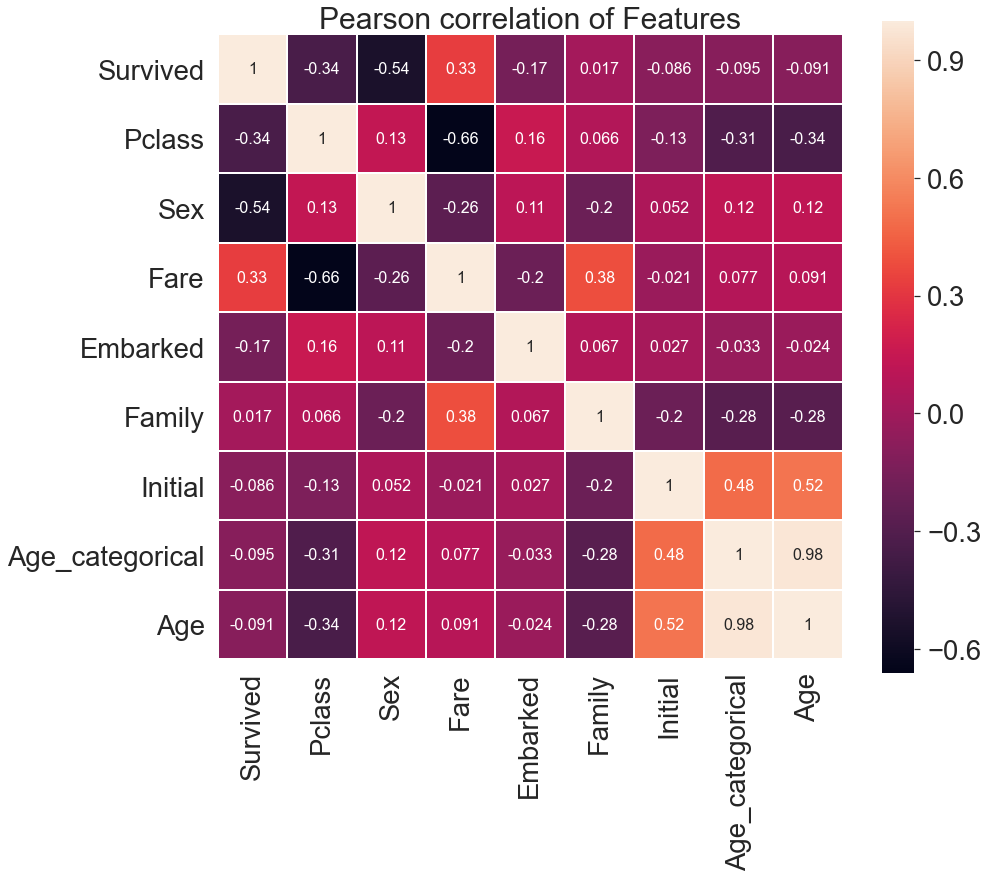

In [48]:
# 각 feature들의 상관관계를 파악해보자
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 
                      'Family', 'Initial', 'Age_categorical', 'Age']] 

plt.figure(figsize = (14, 12))
plt.title('Pearson correlation of Features')

# linewidths : 각 셀을 나눌 선의 두께 
# linecolor : 셀을 나눠주는 선의 색을 지정
# vmax : 오른쪽에 위치한 컬러바의 최댓값 지정
# annot : 셀 안에 숫자를 출력
# annot_kws : 셀 안에 숫자의 크기를 조정
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1, 
            linecolor = 'white', annot = True , annot_kws = {'size' : 16}, square = True)

del heatmap_data

### EDA에서 살펴봤듯이 Sex, Pclass가 Survived에 상관관계 존재
### 그리고 Embarked, Fare도 상관관계가 존재
### 그렇지만 서로 강한 상관관계를 가지는 feature들이 없음
### => 모델을 학습 시킬 때, 불필요한 feature가 없다는 것을 의미

# Data preprocessing

In [49]:
# one-hot encoding

# prefix : 원핫 인코딩하는 데이터들의 열 이름을 지정
train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

In [50]:
# Drop columns 
# 필요없는 columns : 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 
               'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 
              'Cabin'], axis=1, inplace=True)

# 모델 개발 및 학습

In [51]:
# 지금 타이타닉 문제는 target class(survived)를 구하는 것이고, 0과 1로 이루어져 있으므로
# binary classfication 문제이다.
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

In [52]:
# 데이터 분리
train_drop = train.drop('Survived', axis = 1).values
target = train['Survived'].values
test_drop = test.values

In [53]:
train_drop.shape, test_drop.shape

((891, 14), (418, 14))

In [54]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(train_drop, target, test_size = 0.2, 
                                                   random_state = 2018)

In [55]:
# 모델 생성
model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)
prediction = model.predict(X_TEST)

In [56]:
# 정확도 확인
print(metrics.accuracy_score(prediction, Y_TEST))

0.8100558659217877


In [57]:
# 학습된 모델은 feature importance를 가지게 됌
# 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인 가능
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = test.columns)

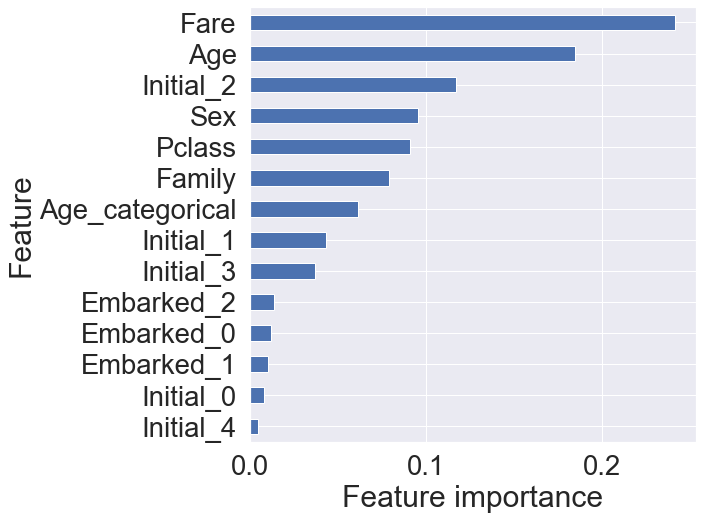

In [58]:
plt.figure(figsize = (8, 8))

Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

In [60]:
# 제출 파일
submission = pd.read_csv('/Users/kimdaehyeon/kaggle/exercise/타이타닉/sample_submission.csv')

prediction = model.predict(test_drop)
submission['Survived'] = prediction
submission.to_csv('my_first_submission.csv', index=False)

### 출처 : https://www.kaggle.com/code/daehungwak/guide-kor-dg/notebook
### 보면서 이해하는 것도 매우 어려움. ㅠ_ㅠ